# Loading data and package

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [81]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [82]:
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [84]:
data = pd.read_csv('Google_Stock_Price_Train.csv',sep=",")

# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values

train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

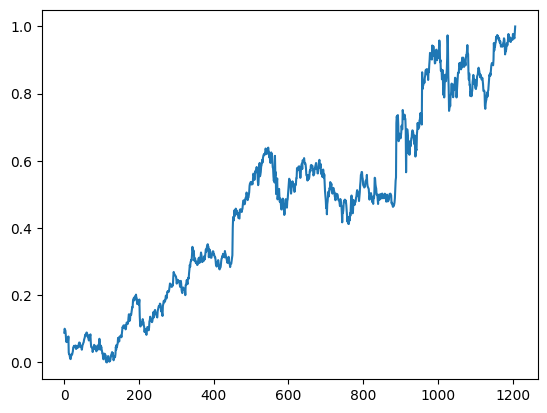

In [85]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [86]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

# 打印数据形状
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1158, 50, 1)
y_train shape: (1158,)


# RNN

In [87]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 4s 80ms/step - loss: 0.5491
Epoch 2/100
37/37 [==============================] - 3s 84ms/step - loss: 0.3073
Epoch 3/100
37/37 [==============================] - 3s 82ms/step - loss: 0.2293
Epoch 4/100
37/37 [==============================] - 3s 83ms/step - loss: 0.1937
Epoch 5/100
37/37 [==============================] - 3s 82ms/step - loss: 0.1563
Epoch 6/100
37/37 [==============================] - 3s 81ms/step - loss: 0.1290
Epoch 7/100
37/37 [==============================] - 3s 83ms/step - loss: 0.1053
Epoch 8/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0870
Epoch 9/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0779
Epoch 10/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0694
Epoch 11/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0621
Epoch 12/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0552
Epoch 13/100
37/37 [=====

In [88]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [89]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [90]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 63ms/step


# Visualization of RNN

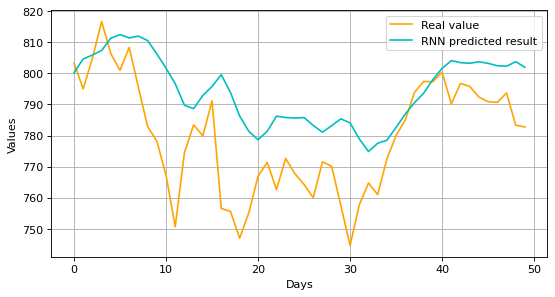

In [91]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# LSTM

In [92]:
# ------ LSTM --------------

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [93]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
1158/1158 [==============================] - 5s 3ms/step - loss: 0.0035
Epoch 2/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 3/50
1158/1158 [==============================] - 4s 3ms/step - loss: 8.3760e-04
Epoch 4/50
1158/1158 [==============================] - 3s 3ms/step - loss: 7.5110e-04
Epoch 5/50
1158/1158 [==============================] - 3s 3ms/step - loss: 6.4377e-04
Epoch 6/50
1158/1158 [==============================] - 3s 3ms/step - loss: 6.0462e-04
Epoch 7/50
1158/1158 [==============================] - 3s 3ms/step - loss: 5.4959e-04
Epoch 8/50
1158/1158 [==============================] - 4s 3ms/step - loss: 5.3487e-04
Epoch 9/50
1158/1158 [==============================] - 3s 3ms/step - loss: 4.5166e-04
Epoch 10/50
1158/1158 [==============================] - 3s 3ms/step - loss: 4.2888e-04
Epoch 11/50
1158/1158 [==============================] - 3s 3ms/step - loss: 4.1184e-04
Epoch 12/50
1158/1158 [==========================

In [94]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 0s 5ms/step


# Visualization of LSTM

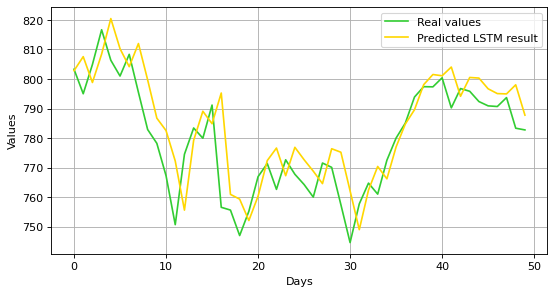

In [95]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# GRU

In [96]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [97]:
GRUmodel = Sequential()

GRUmodel.add(GRU(50,
                 activation="tanh", 
                 recurrent_activation="sigmoid", 
                 input_shape=(None, 1)))

GRUmodel.add(Dropout(rate=0.2))
GRUmodel.add(Dense(1))  # 输出层

GRUmodel.compile(loss='mean_squared_error', optimizer='adam')

# 打印模型结构
GRUmodel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 50)                7950      
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [98]:
# 训练模型
GRUhistory = GRUmodel.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 准备测试数据
inputs = np.concatenate((train[-timesteps:], test), axis=0)
inputs_scaled = scaler.transform(inputs)

# 动态调整 timesteps 或填充数据
if inputs_scaled.shape[0] < timesteps:
    padding = np.zeros((timesteps - inputs_scaled.shape[0], 1))
    inputs_scaled = np.vstack((padding, inputs_scaled))

X_test = []
for i in range(timesteps, inputs_scaled.shape[0]):
    X_test.append(inputs_scaled[i - timesteps:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



Epoch 1/50
37/37 [==============================] - 1s 9ms/step - loss: 0.0463
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 11/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 12/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 13/50
37/37 [==============================

In [99]:
# 确保形状匹配
print(f"Model expects input shape: {GRUmodel.input_shape}")
print(f"X_test shape: {X_test.shape}")

# 预测测试数据
predicted_stock_price = GRUmodel.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Model expects input shape: (None, None, 1)
X_test shape: (50, 50, 1)
2/2 [==============================] - 0s 5ms/step


# Visualization of GRU

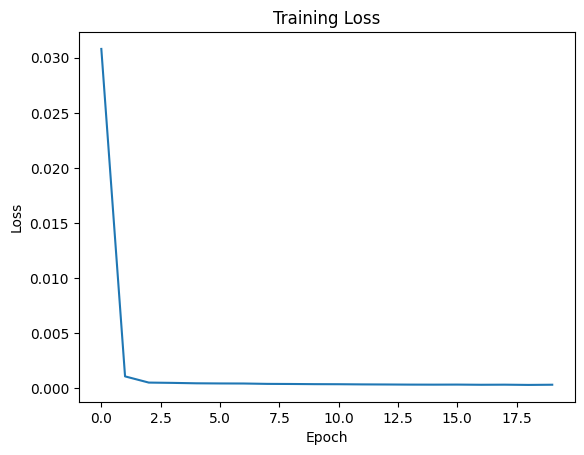

In [100]:
# 绘制训练损失
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

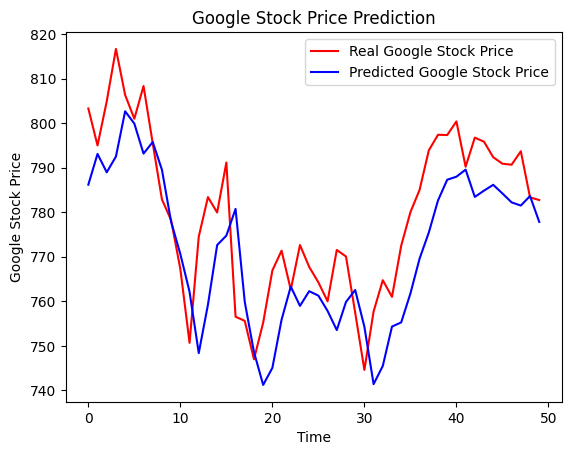

In [101]:
# 可视化预测结果
plt.plot(test, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Visualization of RNN vs LSTM vs GRU

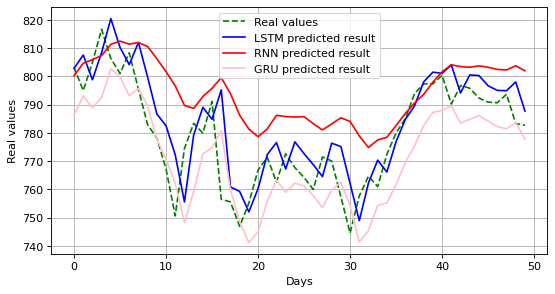

In [116]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.plot(predicted_stock_price, color="pink", label="GRU predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

Now we change hyperparemeter like "units, number of layers, epochs, batch_size, activation" in RNN

# Modified RNN

In [106]:
# RNN Modified

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Initialising the RNN
regressor = Sequential()


regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1)) 

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 200, batch_size = 16)

Epoch 1/200
73/73 [==============================] - 4s 42ms/step - loss: 0.0423
Epoch 2/200
73/73 [==============================] - 3s 41ms/step - loss: 0.0146
Epoch 3/200
73/73 [==============================] - 3s 44ms/step - loss: 0.0090
Epoch 4/200
73/73 [==============================] - 3s 42ms/step - loss: 0.0077
Epoch 5/200
73/73 [==============================] - 3s 43ms/step - loss: 0.0057
Epoch 6/200
73/73 [==============================] - 3s 41ms/step - loss: 0.0050
Epoch 7/200
73/73 [==============================] - 3s 41ms/step - loss: 0.0046
Epoch 8/200
73/73 [==============================] - 3s 42ms/step - loss: 0.0041
Epoch 9/200
73/73 [==============================] - 3s 43ms/step - loss: 0.0036
Epoch 10/200
73/73 [==============================] - 3s 42ms/step - loss: 0.0034
Epoch 11/200
73/73 [==============================] - 3s 42ms/step - loss: 0.0033
Epoch 12/200
73/73 [==============================] - 3s 43ms/step - loss: 0.0028
Epoch 13/200
73/73 [=====

In [107]:
regressor.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 50, 100)           10200     
                                                                 
 dropout_19 (Dropout)        (None, 50, 100)           0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 50)                7550      
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


In [108]:
predicted_data_modified = regressor.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)

2/2 [==============================] - 0s 21ms/step


# Visualization of RNN vs Modified RNN

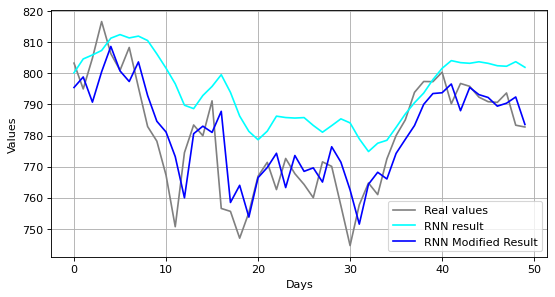

In [109]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="gray",label="Real values")
plt.plot(predicted_data,color="cyan",label="RNN result")
plt.plot(predicted_data_modified,color="blue",label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It looks Modified RNN more successful than RNN.

# Modified LSTM

In [110]:
#  LSTM Modified

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler 


model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=4) #degistirdim train leri RNN kilerle

Epoch 1/200
290/290 [==============================] - 2s 4ms/step - loss: 0.0072
Epoch 2/200
290/290 [==============================] - 1s 3ms/step - loss: 9.6502e-04
Epoch 3/200
290/290 [==============================] - 1s 3ms/step - loss: 8.6537e-04
Epoch 4/200
290/290 [==============================] - 1s 4ms/step - loss: 7.7229e-04
Epoch 5/200
290/290 [==============================] - 1s 4ms/step - loss: 7.7161e-04
Epoch 6/200
290/290 [==============================] - 1s 4ms/step - loss: 6.9884e-04
Epoch 7/200
290/290 [==============================] - 1s 4ms/step - loss: 6.9859e-04
Epoch 8/200
290/290 [==============================] - 1s 4ms/step - loss: 6.8977e-04
Epoch 9/200
290/290 [==============================] - 1s 4ms/step - loss: 6.1436e-04
Epoch 10/200
290/290 [==============================] - 1s 4ms/step - loss: 5.9368e-04
Epoch 11/200
290/290 [==============================] - 1s 4ms/step - loss: 6.4942e-04
Epoch 12/200
290/290 [==============================] - 

In [111]:
predicted_data2_modified=model.predict(X_test)
predicted_data2_modified=scaler.inverse_transform(predicted_data2_modified)

2/2 [==============================] - 0s 3ms/step


# Visualization of LSTM vs Modified LSTM

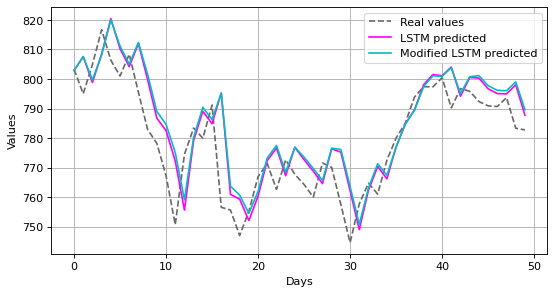

In [112]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real values", linestyle="dashed")
plt.plot(predicted_data2,color="Magenta",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="c", label="Modified LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Modified LSTM looks more successful than LSTM.

# Visualization of LSTM vs Modified LSTM vs RNN vs Modified RNN vs GRU

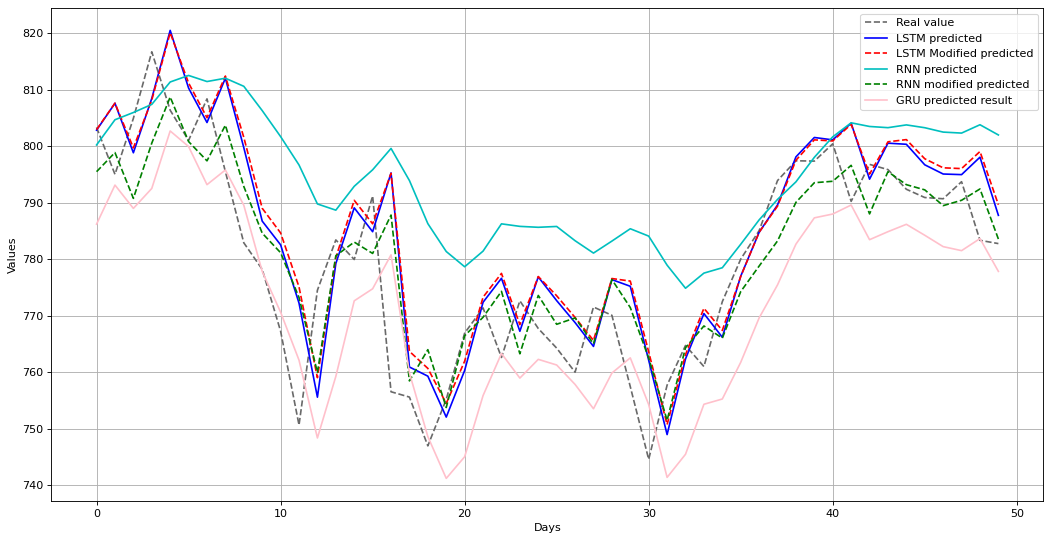

In [115]:
# visualization LSTM vs LSTM modified vs RNN vs RNN modified

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real value", linestyle="dashed")
plt.plot(predicted_data2,color="blue",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="red", linestyle="dashed", label="LSTM Modified predicted")
plt.plot(predicted_data,color="c",label="RNN predicted")
plt.plot(predicted_data_modified,color="green", linestyle="dashed", label="RNN modified predicted")
plt.plot(predicted_stock_price, color="pink", label="GRU predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

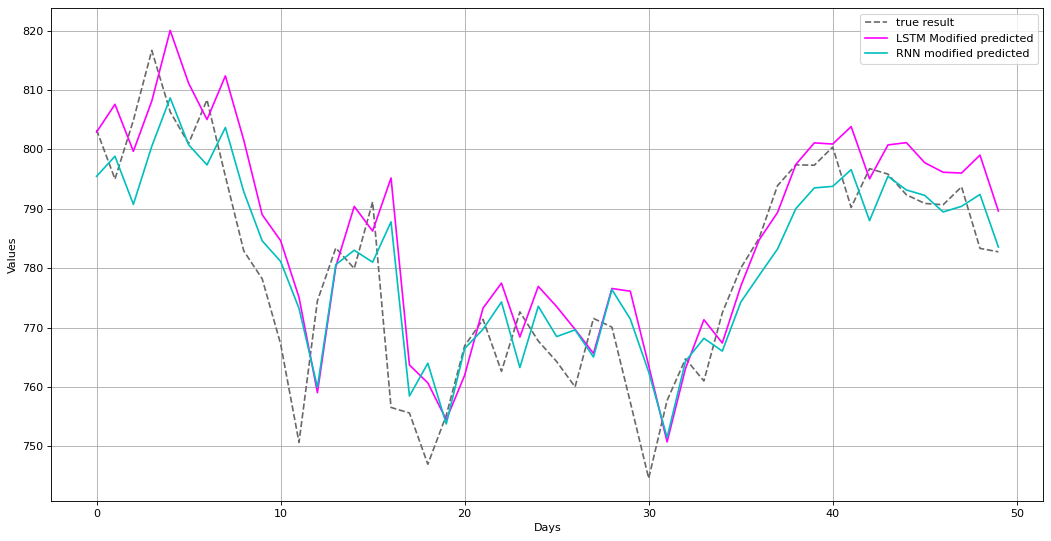

In [114]:
# Visualization Modified RNN vs Modified LSTM

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray", linestyle= "dashed", label="true result")
plt.plot(predicted_data2_modified,color="Magenta",  label="LSTM Modified predicted")
plt.plot(predicted_data_modified,color="c",  label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Conclusion
Changing hyperparameter can increase to accuracy.

LSTM looks more successful than RNN in predict to values about time.